## Import Libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('hotel_bookings.csv')

In [3]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


## About the dataset:
This [data article](https://www.sciencedirect.com/science/article/pii/S2352340918315191#s0005) describes a datasets with hotel demand data. One of the hotels (H1) is a resort hotel and the other is a city hotel (H2). the dataset contains 32 variables describing the 40,060 observations of H1 and 79,330 observations of H2. Each observation represents a hotel booking. the dataset comprehend bookings due to arrive between the 1st of July of 2015 and the 31st of August 2017, including bookings that effectively arrived and bookings that were canceled. Since this is hotel real data, all data elements pertaining hotel or costumer identification were deleted. Due to the scarcity of real business data for scientific and educational purposes, this dataset can have an important role for research and education in revenue management, machine learning, or data mining, as well as in other fields. 
You can download the Hotel Booking Demand dataset from the Kaggle [click here](https://www.kaggle.com/jessemostipak/hotel-booking-demand).

## Attribute Information:
- **hotel**: Hotel (Resort Hotel, City Hotel)
- **is_canceled**: Value indicating if the booking was canceled (1) or not (0)
- **lead_time**: Number of days that elapsed between the entering date of the booking into the PMS and the arrival date
- **arrival_date_year**: Year of arrival date
- **arrival_date_month**: Month of arrival date
- **arrival_date_week_number**: Week number of year for arrival date
- **arrival_date_day_of_month**: Day of arrival date
- **stays_in_weekend_nights**: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
- **stays_in_week_nights**: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
- **adults**: Number of adults
- **children**: Number of children
- **babies**: Number of babies
- **meal**: Type of meal booked. Categories are presented in standard hospitality meal packages: Undefined/SC – no meal package; BB – Bed & Breakfast; HB – Half board (breakfast and one other meal – usually dinner); FB – Full board (breakfast, lunch and dinner)
- **country**: Country of origin. Categories are represented in the ISO 3155–3:2013 format
- **market_segment**: Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators”
- **distribution_channel**: Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators”
- **is_repeated_guest**: Value indicating if the booking name was from a repeated guest (1) or not (0)
- **previous_cancellations**: Number of previous bookings that were cancelled by the customer prior to the current booking
- **previous_bookings_not_canceled**: Number of previous bookings not cancelled by the customer prior to the current booking
- **reserved_room_type**: Code of room type reserved. Code is presented instead of designation for anonymity reasons.
- **assigned_room_type**: Code for the type of room assigned to the booking. Sometimes the assigned room type differs from the reserved room type due to hotel operation reasons (e.g. overbooking) or by customer request. Code is presented instead of designation for anonymity reasons.
- **booking_changes**: Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation
- **deposit_type**: Indication on if the customer made a deposit to guarantee the booking. This variable can assume three categories: No Deposit – no deposit was made; Non Refund – a deposit was made in the value of the total stay cost; Refundable – a deposit was made with a value under the total cost of stay.
- **agent**: ID of the travel agency that made the booking
- **company**: ID of the company/entity that made the booking or responsible for paying the booking. ID is presented instead of designation for anonymity reasons
- **days_in_waiting_list**: Number of days the booking was in the waiting list before it was confirmed to the customer
- **customer_type**: Type of booking, assuming one of four categories: Contract - when the booking has an allotment or other type of contract associated to it; Group – when the booking is associated to a group; Transient – when the booking is not part of a group or contract, and is not associated to other transient booking; Transient-party – when the booking is transient, but is associated to at least other transient booking
- **adr**: Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights
- **required_car_parking_spaces**: Number of car parking spaces required by the customer
- **total_of_special_requests**: Number of special requests made by the customer (e.g. twin bed or high floor)
- **reservation_status**: Reservation last status, assuming one of three categories: Canceled – booking was canceled by the customer; Check-Out – customer has checked in but already departed; No-Show – customer did not check-in and did inform the hotel of the reason why
- **reservation_status_date**: Date at which the last status was set. This variable can be used in conjunction with the ReservationStatus to

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [5]:
df.shape

(119390, 32)

In [6]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [7]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [8]:
df.describe(include='object')

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3,926
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,2015-10-21
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166,1461


## Does the type of payment affect the cancellation of the reservation or not?

In [9]:
deposit= df['deposit_type'].value_counts()
deposit

No Deposit    104641
Non Refund     14587
Refundable       162
Name: deposit_type, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

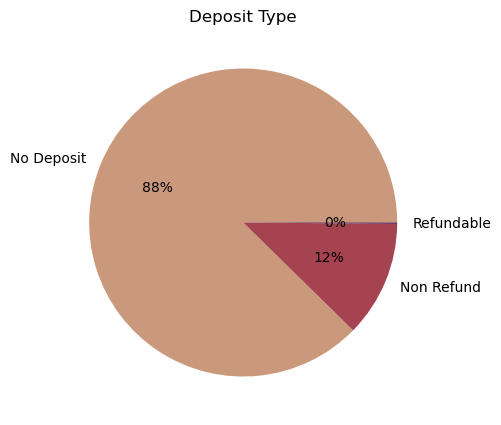

In [55]:
plt.figure(figsize=(10,5))

plt.pie(deposit , labels= deposit.index , autopct='%1.0f%%', colors=sns.color_palette("twilight_r"));  
plt.title('Deposit Type')

plt.show    

### Insights:
- 12% were 'Non Refund' payments. maybe they were more committed to their reservations.
- Most reservations were made without any deposit ('No Deposit').



## Does length of time between the entering date of the booking and the arrival date affect the cancellation?

In [23]:
data = df[['lead_time','is_canceled']]
filterd_data=data.groupby('lead_time')['is_canceled'].mean().reset_index()
filterd_data

,lead_time,is_canceled
0,0,0.067770
1,1,0.092775
2,2,0.102948
3,3,0.100220
4,4,0.102624
...,...,...
474,622,1.000000
475,626,1.000000
476,629,1.000000
477,709,0.000000


In [24]:
filterd_data['is_canceled'] *= 100
filterd_data

,lead_time,is_canceled
0,0,6.776990
1,1,9.277457
2,2,10.294828
3,3,10.022026
4,4,10.262391
...,...,...
474,622,100.000000
475,626,100.000000
476,629,100.000000
477,709,0.000000


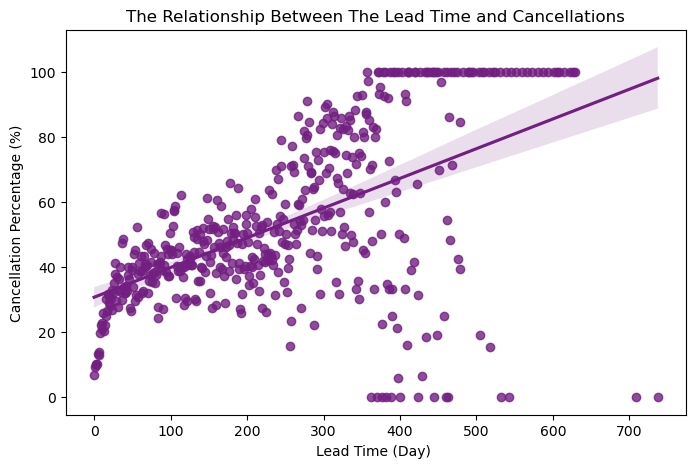

In [77]:
plt.figure(figsize=(8,5))
color=sns.color_palette("magma", 2)[0]
sns.regplot(x='lead_time', y='is_canceled', data=filterd_data , color=color);

plt.xlabel('Lead Time (Day) ')
plt.ylabel('Cancellation Percentage (%)')
plt.title('The Relationship Between The Lead Time and Cancellations')
plt.show()

### Insights:
- Lead time (Day) from 360 and 630 have 100% cancellation percentage. 
- Cancellation percentage and lead time have a positive correlation.


## Which months that have lowest number of visitors?

<Figure size 1000x500 with 0 Axes>

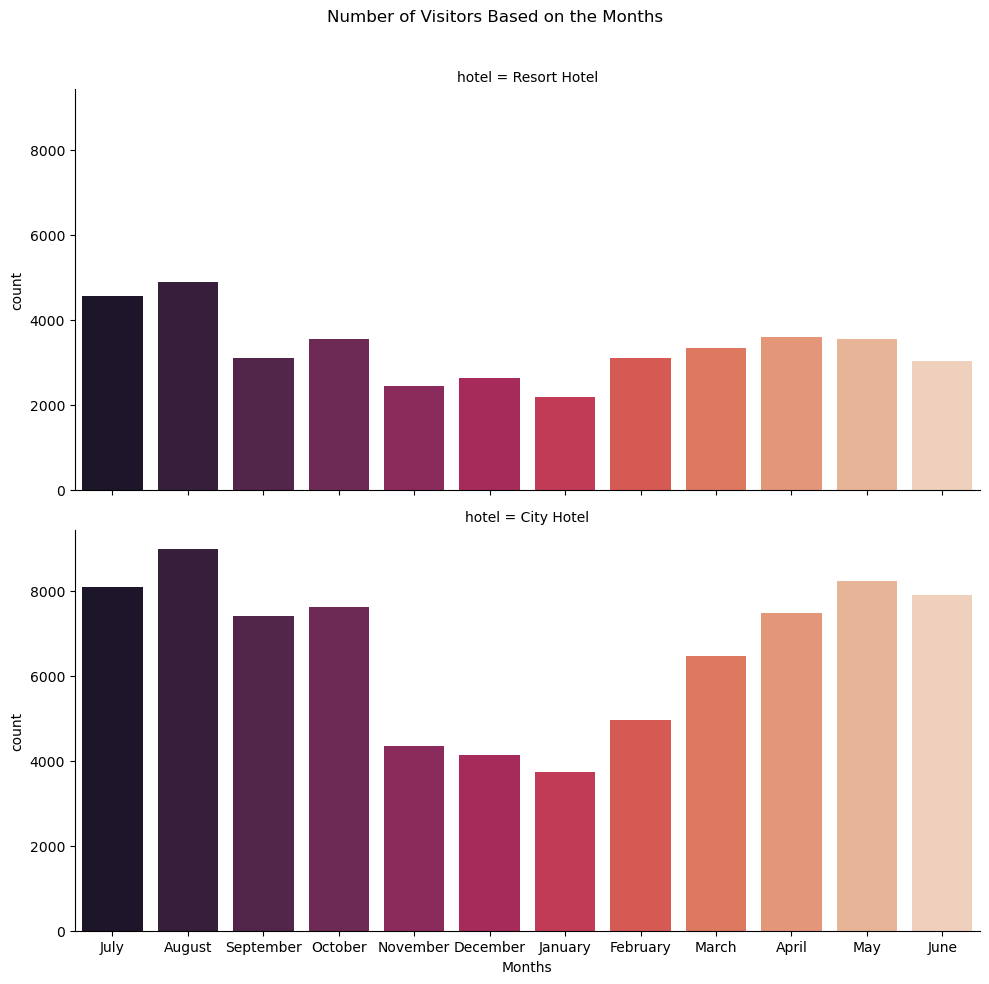

In [104]:
plt.figure(figsize=(10,5))

sns.catplot(data=df, x='arrival_date_month', row='hotel', kind='count', aspect=2, palette="rocket")

plt.suptitle('Number of Visitors Based on the Months')
plt.subplots_adjust(top=0.9)

plt.xlabel('Months')
plt.show()

- January has lowest number of visitors.

## Check if the lowest number of visitors due to the increase in the number of the canceled reservations?

<Figure size 1000x500 with 0 Axes>

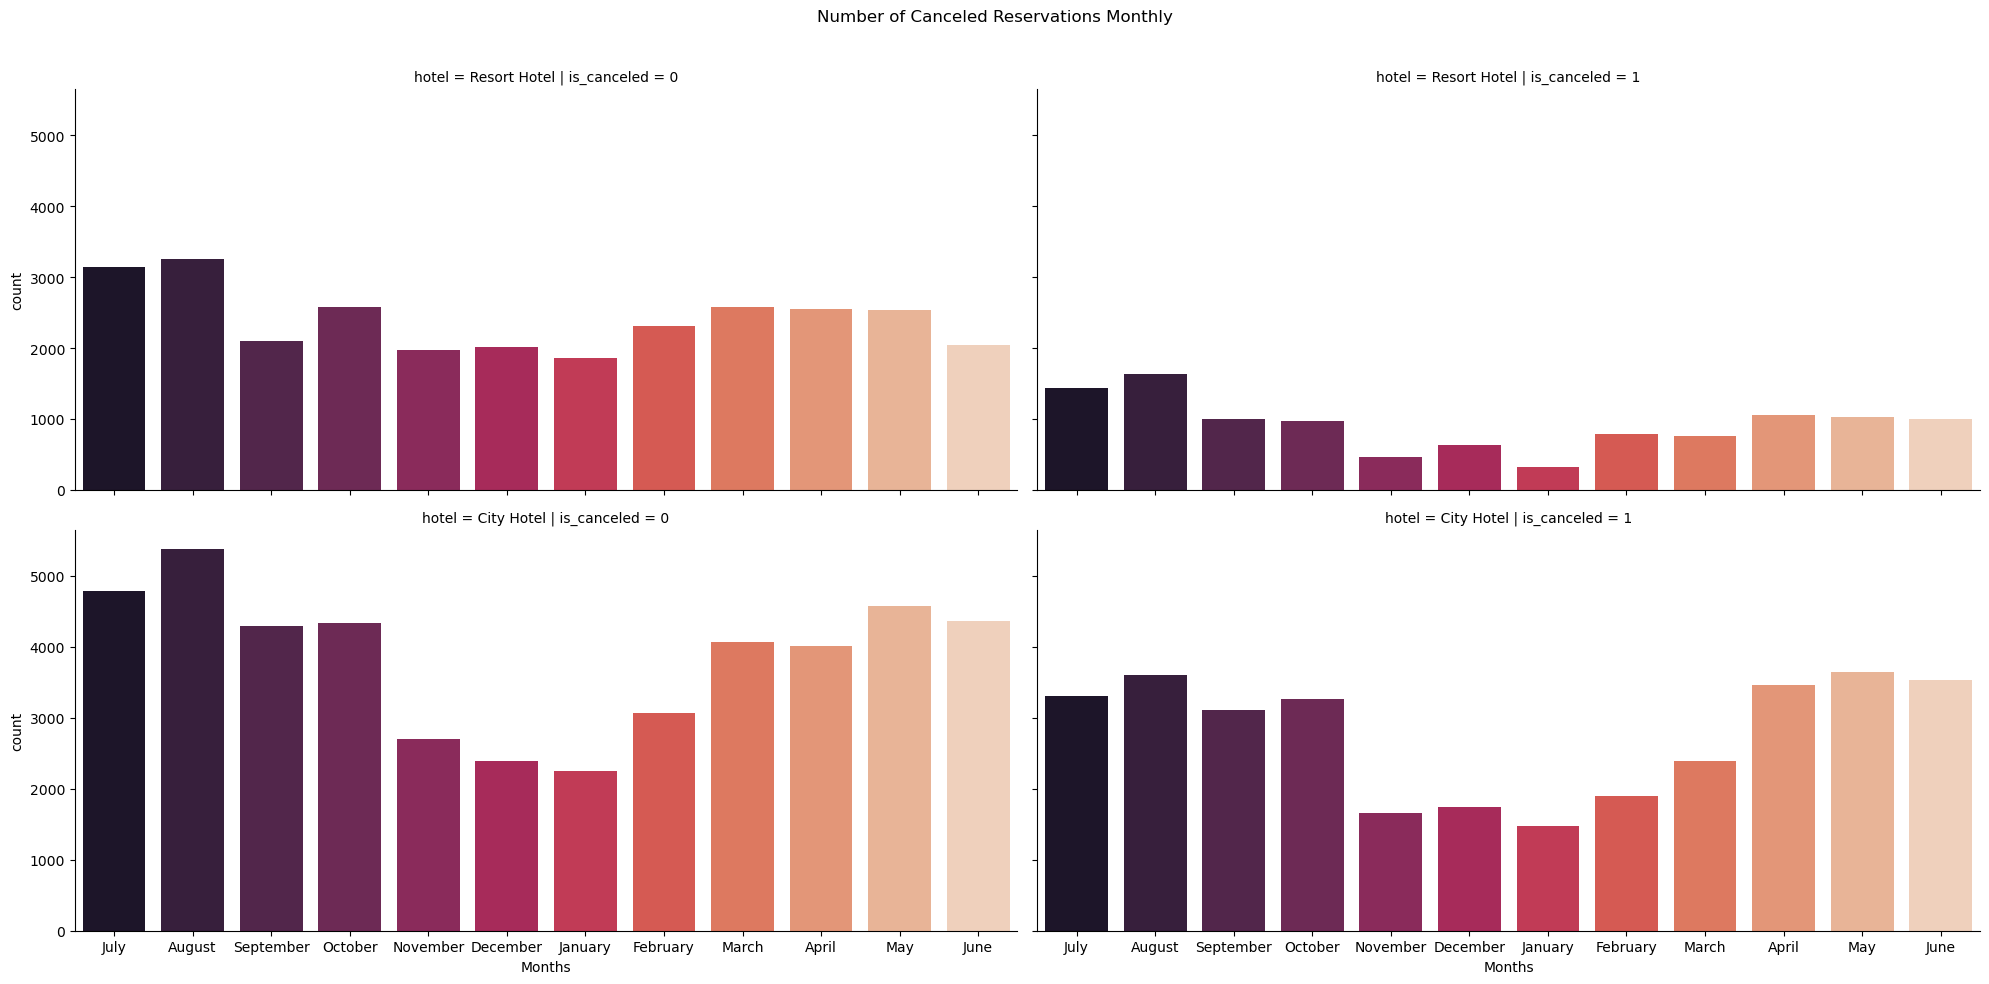

In [110]:
plt.figure(figsize=(10,5))

fig= sns.catplot(data=df, x='arrival_date_month', row='hotel',col='is_canceled', kind='count', aspect=2, palette="rocket");
plt.suptitle('Number of Canceled Reservations Monthly')
plt.subplots_adjust(top=0.9) 

fig.set_xlabels('Months')
plt.show()

### Insights:
- The number of visitor decreases when the cancellations increases.
- August has the Highest number of visitors


## Which top 10 countries that visitors come from?      

In [95]:
Top10_country = df['country'].value_counts().head(10)
Top10_country

PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
ITA     3766
IRL     3375
BEL     2342
BRA     2224
NLD     2104
Name: country, dtype: int64

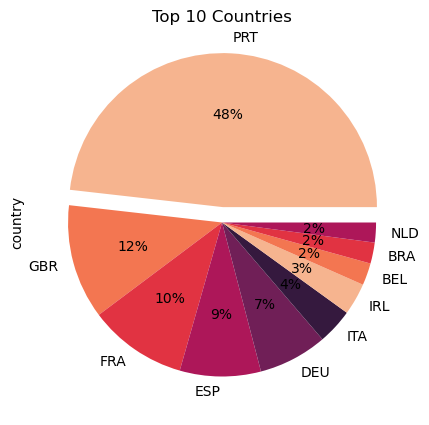

In [106]:
plt.figure(figsize=(10,5))

plt.pie(Top10_country, labels=Top10_country.index, autopct='%.0f%%', colors=sns.set_palette('rocket_r')
 , explode=[0.1,0,0,0,0,0,0,0,0,0]);
plt.title('Top 10 Countries')
plt.ylabel('country')
plt.show()

### Insights:
- Portugal is The Top visitors.




## Relation between booking changes and cancelling the reservation

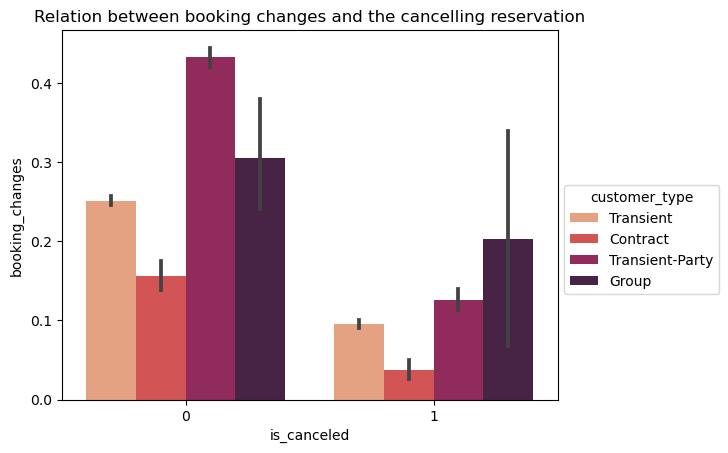

In [111]:
sns.barplot(data=df, x='is_canceled', y='booking_changes', hue='customer_type',palette='rocket_r')
plt.title('Relation between booking changes and the cancelling reservation');
plt.legend(bbox_to_anchor=(1, 0.6),title='customer_type');

### Insights:
- Group reservations were the highest cancellation rate.
- Most of customer type did not cancel thier reservation.


# Data Preprocessing

In [122]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [123]:
# Drop the columns with null values
df = df.drop(['agent' ,'company', 'country'], axis=1, errors="ignore")

In [124]:
df.dropna(subset = ["children"], inplace=True)

In [125]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
reservation_status          

In [126]:
df = df.drop(['hotel','arrival_date_month','meal','customer_type',
              'market_segment', 'distribution_channel','assigned_room_type',
              'reserved_room_type', 'deposit_type', 'customer_type', 'reservation_status', 
              'reservation_status_date'], axis=1, errors="ignore")

In [127]:
df.dtypes

is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
booking_changes                     int64
days_in_waiting_list                int64
adr                               float64
required_car_parking_spaces         int64
total_of_special_requests           int64
dtype: object

In [128]:
X, y = df.drop(['is_canceled'],axis=1), df['is_canceled']

### Choose any machine learning algorithm to predict cancellation 
- use train-test split

In [129]:
from sklearn.model_selection import train_test_split

In [130]:
X_train , X_test , y_train , y_test = train_test_split(X, y, test_size=0.3, random_state=23)

In [136]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics 
from sklearn.metrics import accuracy_score

LogisticRegression = LogisticRegression()

In [137]:
LogisticRegression.fit(X_train , y_train)

LogisticRegression()

In [138]:
predictions = LogisticRegression.predict(X_test)
predictions

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

In [139]:
print(metrics.confusion_matrix(y_test, predictions))

[[19689  2994]
 [ 7322  5811]]


In [143]:
print('MAE:' , metrics.mean_absolute_error(y_test , predictions) )
print('MSE:' , metrics.mean_squared_error(y_test , predictions) )
print('RMAE:' ,np.sqrt(metrics.mean_squared_error(y_test , predictions) ))
print ('R^2:' , metrics.r2_score(y_test , predictions))
print("Accuracy:",metrics.accuracy_score(y_test, predictions))


MAE: 0.2880276971186062
MSE: 0.2880276971186062
RMAE: 0.5366821192462128
R^2: -0.24029210089100994
Accuracy: 0.7119723028813938


## Try to use the following techniques: PCA, pipelines, and Grid Search to enhance your model accuracy.

In [149]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report


In [147]:
pipe = make_pipeline(StandardScaler(),
                     PCA(n_components=3),
                     LogisticRegression())

pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.6729673888764798

In [150]:
pred = pipe.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.73      0.87      0.79     22683
           1       0.66      0.44      0.53     13133

    accuracy                           0.71     35816
   macro avg       0.69      0.66      0.66     35816
weighted avg       0.70      0.71      0.70     35816



In [151]:
pipe2 = make_pipeline(
    StandardScaler(),
    PCA(),
    LogisticRegression())

In [152]:
param_grid = {
    "standardscaler__with_mean": [True, False],
    "standardscaler__with_std": [True, False],
    "pca__n_components": [1,2,3,4,5], 
    "logisticregression__C": [1, 0.9, 0.8, 0.7, 0.6],
    "logisticregression__max_iter": [100, 500]
}

grid = GridSearchCV(
    pipe2, 
    param_grid=param_grid, 
    cv=5, 
    verbose=2,
    n_jobs=-1
)

grid.fit(X_train,y_train)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('pca', PCA()),
                                       ('logisticregression',
                                        LogisticRegression())]),
             n_jobs=-1,
             param_grid={'logisticregression__C': [1, 0.9, 0.8, 0.7, 0.6],
                         'logisticregression__max_iter': [100, 500],
                         'pca__n_components': [1, 2, 3, 4, 5],
                         'standardscaler__with_mean': [True, False],
                         'standardscaler__with_std': [True, False]},
             verbose=2)

In [153]:
grid_df = pd.DataFrame(grid.cv_results_)
grid_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_logisticregression__C,param_logisticregression__max_iter,param_pca__n_components,param_standardscaler__with_mean,param_standardscaler__with_std,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.011354,0.006536,0.019709,0.005147,1,100,1,True,True,"{'logisticregression__C': 1, 'logisticregressi...",0.628096,0.628036,0.627977,0.628036,0.627857,0.628000,0.000081,181
1,1.010003,0.120644,0.019020,0.006122,1,100,1,True,False,"{'logisticregression__C': 1, 'logisticregressi...",0.658430,0.661422,0.659148,0.663575,0.661721,0.660859,0.001858,141
2,0.808631,0.016883,0.030774,0.013851,1,100,1,False,True,"{'logisticregression__C': 1, 'logisticregressi...",0.628096,0.628036,0.627977,0.628036,0.627857,0.628000,0.000081,181
3,0.892202,0.049344,0.028112,0.004879,1,100,1,False,False,"{'logisticregression__C': 1, 'logisticregressi...",0.658430,0.661422,0.659148,0.663575,0.661721,0.660859,0.001858,141
4,0.722230,0.045626,0.024942,0.006945,1,100,2,True,True,"{'logisticregression__C': 1, 'logisticregressi...",0.643712,0.638207,0.638207,0.642994,0.639284,0.640481,0.002388,179


In [154]:
parameters = ['param_logisticregression__max_iter','param_pca__n_components',
              'param_standardscaler__with_mean','param_standardscaler__with_std',
              'mean_test_score','rank_test_score']
grid_df[parameters]

,param_logisticregression__max_iter,param_pca__n_components,param_standardscaler__with_mean,param_standardscaler__with_std,mean_test_score,rank_test_score
0,100,1,True,True,0.628000,181
1,100,1,True,False,0.660859,141
2,100,1,False,True,0.628000,181
3,100,1,False,False,0.660859,141
4,100,2,True,True,0.640481,179
...,...,...,...,...,...,...
195,500,4,False,False,0.666148,81
196,500,5,True,True,0.700335,6
197,500,5,True,False,0.666304,61
198,500,5,False,True,0.700239,8


In [156]:
grid_df[parameters].sort_values(by = ['rank_test_score'])


,param_logisticregression__max_iter,param_pca__n_components,param_standardscaler__with_mean,param_standardscaler__with_std,mean_test_score,rank_test_score
118,500,5,False,True,0.700921,1
178,100,5,False,True,0.700443,2
136,100,5,True,True,0.700431,3
96,100,5,True,True,0.700407,4
156,500,5,True,True,0.700383,5
...,...,...,...,...,...,...
122,100,1,False,True,0.628000,181
42,100,1,False,True,0.628000,181
182,500,1,False,True,0.628000,181
0,100,1,True,True,0.628000,181


In [158]:
grid_df['rank_test_score'].value_counts()


61     20
141    20
101    20
121    20
81     20
       ..
56      1
44      1
22      1
4       1
6       1
Name: rank_test_score, Length: 80, dtype: int64

In [157]:
best = grid_df[parameters].sort_values(by = ['rank_test_score']).head(20)
best

,param_logisticregression__max_iter,param_pca__n_components,param_standardscaler__with_mean,param_standardscaler__with_std,mean_test_score,rank_test_score
118,500,5,False,True,0.700921,1
178,100,5,False,True,0.700443,2
136,100,5,True,True,0.700431,3
96,100,5,True,True,0.700407,4
156,500,5,True,True,0.700383,5
196,500,5,True,True,0.700335,6
116,500,5,True,True,0.700311,7
76,500,5,True,True,0.700239,8
198,500,5,False,True,0.700239,8
158,500,5,False,True,0.700227,10


In [159]:
grid.best_params_


{'logisticregression__C': 0.8,
 'logisticregression__max_iter': 500,
 'pca__n_components': 5,
 'standardscaler__with_mean': False,
 'standardscaler__with_std': True}

In [160]:
best.sort_values(by = ['param_pca__n_components'])


,param_logisticregression__max_iter,param_pca__n_components,param_standardscaler__with_mean,param_standardscaler__with_std,mean_test_score,rank_test_score
118,500,5,False,True,0.700921,1
176,100,5,True,True,0.699916,18
98,100,5,False,True,0.699964,17
78,500,5,False,True,0.700084,16
16,100,5,True,True,0.700096,15
36,500,5,True,True,0.700108,14
18,100,5,False,True,0.700108,13
58,100,5,False,True,0.700179,12
138,100,5,False,True,0.700203,11
158,500,5,False,True,0.700227,10


In [161]:
best['param_pca__n_components'].value_counts()


5    20
Name: param_pca__n_components, dtype: int64

In [162]:
grid.best_score_

0.700921383271509

In [163]:
pred = grid.best_estimator_.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.71      0.88      0.79     22683
           1       0.66      0.39      0.49     13133

    accuracy                           0.70     35816
   macro avg       0.69      0.64      0.64     35816
weighted avg       0.69      0.70      0.68     35816

